# ESG波动率表现

年度ESG数据

In [1]:
import pandas as pd
path='datasets/华证2009-2023年（含细分项+季度)）/华证esg评级2009-2023（细分项）/华证esg评级含细分项（年度）2009-2023.xlsx'
ESG_df = pd.read_excel(path, dtype={'股票代码':str})
ESG_df['股票代码'] = ESG_df['股票代码'].str.zfill(6)
ESG_df.head(1)

,股票代码,年份,综合评级,综合得分,E评级,E得分,S评级,S得分,G评级,G得分,...,重污染分组2,重污染分组3,所属省份代码,所属省份,所属城市代码,所属城市,是否属于西部,是否属于东部,是否属于中部,产权性质
0,000001,2009,BBB,82.38,CCC,69.87,BB,77.46,AA,91.77,...,0.0,0.0,440000.0,广东省,440300.0,深圳市,0.0,1.0,0.0,0.0


价格数据

In [2]:
import pandas as pd
#close_df = pd.read_csv('datasets/processed_data/close.csv', index_col=0)
close_df = pd.read_csv('datasets/processed_data/close.csv')
close_df.index = close_df['time']
close_df.index = pd.to_datetime(close_df.index)
close_df = close_df.iloc[:, 1:]
#close_df.index = pd.to_datetime(close_df.index)
close_df.head(1)

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,601933,601939,601958,601988,601989,601991,601992,601996,601998,601999
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,926.73,1091.9,NaN,61.24,158.64,55.68,NaN,47.34,39.24,35.42,...,NaN,6.42,23.12,4.56,7.63,18.49,NaN,NaN,8.26,11.42


In [3]:
import numpy as np
from tqdm.notebook import tqdm

In [4]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 
import matplotlib.pyplot as plt

ESG_rating:['AAA', 'AA', 'A']
year:2010 有价格数据的ESG个数： 1
year:2011 有价格数据的ESG个数： 4
year:2012 有价格数据的ESG个数： 6
year:2013 有价格数据的ESG个数： 11
year:2014 有价格数据的ESG个数： 7
year:2015 有价格数据的ESG个数： 4
year:2016 有价格数据的ESG个数： 3
year:2017 有价格数据的ESG个数： 16
year:2018 有价格数据的ESG个数： 24
year:2019 有价格数据的ESG个数： 33
year:2020 有价格数据的ESG个数： 34
year:2021 有价格数据的ESG个数： 7
year:2022 有价格数据的ESG个数： 17
year:2023 有价格数据的ESG个数： 39
year:2024 有价格数据的ESG个数： 0
ESG_rating:['BBB']
year:2010 有价格数据的ESG个数： 65
year:2011 有价格数据的ESG个数： 141
year:2012 有价格数据的ESG个数： 164
year:2013 有价格数据的ESG个数： 133
year:2014 有价格数据的ESG个数： 135
year:2015 有价格数据的ESG个数： 111
year:2016 有价格数据的ESG个数： 137
year:2017 有价格数据的ESG个数： 190
year:2018 有价格数据的ESG个数： 233
year:2019 有价格数据的ESG个数： 263
year:2020 有价格数据的ESG个数： 251
year:2021 有价格数据的ESG个数： 84
year:2022 有价格数据的ESG个数： 112
year:2023 有价格数据的ESG个数： 220
year:2024 有价格数据的ESG个数： 0
ESG_rating:['BB']
year:2010 有价格数据的ESG个数： 440
year:2011 有价格数据的ESG个数： 618
year:2012 有价格数据的ESG个数： 665
year:2013 有价格数据的ESG个数： 661
year:2014 有价格数据的ESG个数： 578
year:2015 有价格数据

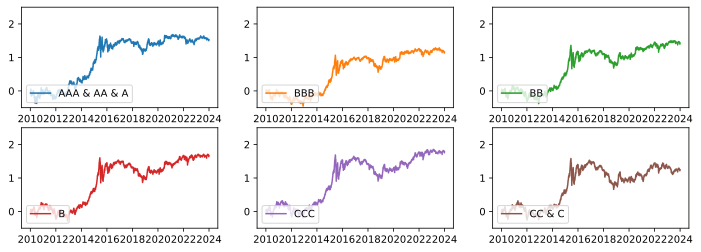

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,4)) 
ax = ax.flatten()
i = 0
for e in [['AAA', 'AA', 'A'], ['BBB'],['BB'],['B'],['CCC'],['CC','C']]:
    print('ESG_rating:%s' %e)
    all_avg_ret = pd.DataFrame()
    for year in close_df.index.year.unique():  # 年份
        #print('year:%s' %year)
        sub_ESG_df = ESG_df[ESG_df['年份'] == year]
        sub_sub_ESG_df = sub_ESG_df[sub_ESG_df['综合评级'].isin(e)]
        
        #print('ESG个数：',sub_sub_ESG_df.shape[0])
        c = close_df.loc[[i for i in close_df.index if i.year == year]]
        
        #print('有价格数据的个数:', c.shape[1])
        code_list = np.intersect1d(sub_sub_ESG_df['股票代码'].values, c.columns.values)
        
        print('year:%s' %year, '有价格数据的ESG个数：', len(code_list))
        
        ret = c[code_list].diff()/c[code_list].shift(1)
        avg_ret = ret.mean(axis=1)
        all_avg_ret = pd.concat([all_avg_ret, avg_ret])
    cum_ret = all_avg_ret.cumsum()
    ax[i].plot(pd.to_datetime(cum_ret.index), cum_ret, label=' & '.join(e), color='C%s' %i)
    ax[i].set_ylim(-0.5, 2.5)
    ax[i].legend(loc=3)
    i += 1
#plt.savefig('ESG_ret.eps')
plt.show()

In [6]:
def calculate_volatility(open_, high, low, close):
    term1 = 0.511 * (high - low) ** 2
    term2 = -0.019 * ((close - open_) * (high + low - 2 * open_) - 2 * (high - open_) * (low - open_))
    term3 = -0.383 * (close - open_) ** 2
    #print (term1 + term2)
    volatility = np.sqrt(term1 + term2 + term3)/open_
    return volatility

In [7]:
import pandas as pd
close_df = pd.read_csv('datasets/processed_data/close.csv')
close_df.index = close_df['time']
#close_df.index = pd.to_datetime(close_df.index)
close_df = close_df.iloc[:, 1:]
close_df.head(1)

open_df = pd.read_csv('datasets/processed_data/open.csv')
open_df.index = open_df['time']
open_df = open_df.iloc[:, 1:]

high_df = pd.read_csv('datasets/processed_data/high.csv')
high_df.index = high_df['time']
high_df = high_df.iloc[:, 1:]

low_df = pd.read_csv('datasets/processed_data/low.csv')
low_df.index = low_df['time']
low_df = low_df.iloc[:, 1:]
close_df.shape

(3504, 2212)

In [8]:
vol_df = calculate_volatility(open_df, high_df, low_df, close_df)

/Users/hans/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [9]:
vol_df.index = pd.to_datetime(vol_df.index)
vol_df.head(1)

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,601933,601939,601958,601988,601989,601991,601992,601996,601998,601999
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.015717,0.010109,NaN,0.016369,0.009498,0.012674,NaN,0.011762,0.015458,0.005756,...,NaN,0.015133,0.010491,0.01207,0.012642,0.012517,NaN,NaN,0.014804,0.017653


In [10]:
vol_df.loc['2010-01-04'].describe()

count    1547.000000
mean        0.019953
std         0.010094
min         0.000000
25%         0.012934
50%         0.017398
75%         0.024450
max         0.073304
Name: 2010-01-04 00:00:00, dtype: float64

In [11]:
vol_cond_df = pd.read_csv('datasets/processed_data/conditional_vol.csv', index_col=0)
vol_cond_df.index = pd.to_datetime(vol_cond_df.index)
vol_cond_df.head(1)

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,601933,601939,601958,601988,601989,601991,601992,601996,601998,601999
time,,,,,,,,,,,,,,,,,,,,,
2012-01-20,1.88416,2.066665,2.286852,0.731061,2.407929,2.721594,2.209964,2.812903,1.363675,3.331488,...,2.75514,1.089197,2.288879,0.861095,2.136018,1.535771,2.686177,2.376037,1.324802,2.29764


ESG_rating:['AAA', 'AA', 'A']
year:2010 有价格数据的ESG个数： 1
year:2011 有价格数据的ESG个数： 4
year:2012 有价格数据的ESG个数： 6
year:2013 有价格数据的ESG个数： 11
year:2014 有价格数据的ESG个数： 7
year:2015 有价格数据的ESG个数： 4
year:2016 有价格数据的ESG个数： 3
year:2017 有价格数据的ESG个数： 16
year:2018 有价格数据的ESG个数： 24
year:2019 有价格数据的ESG个数： 33
year:2020 有价格数据的ESG个数： 34
year:2021 有价格数据的ESG个数： 7
year:2022 有价格数据的ESG个数： 17
year:2023 有价格数据的ESG个数： 39
year:2024 有价格数据的ESG个数： 0
ESG_rating:['BBB']
year:2010 有价格数据的ESG个数： 65
year:2011 有价格数据的ESG个数： 141
year:2012 有价格数据的ESG个数： 164
year:2013 有价格数据的ESG个数： 133
year:2014 有价格数据的ESG个数： 135
year:2015 有价格数据的ESG个数： 111
year:2016 有价格数据的ESG个数： 137
year:2017 有价格数据的ESG个数： 190
year:2018 有价格数据的ESG个数： 233
year:2019 有价格数据的ESG个数： 263
year:2020 有价格数据的ESG个数： 251
year:2021 有价格数据的ESG个数： 84
year:2022 有价格数据的ESG个数： 112
year:2023 有价格数据的ESG个数： 220
year:2024 有价格数据的ESG个数： 0
ESG_rating:['BB']
year:2010 有价格数据的ESG个数： 440
year:2011 有价格数据的ESG个数： 618
year:2012 有价格数据的ESG个数： 665
year:2013 有价格数据的ESG个数： 661
year:2014 有价格数据的ESG个数： 578
year:2015 有价格数据

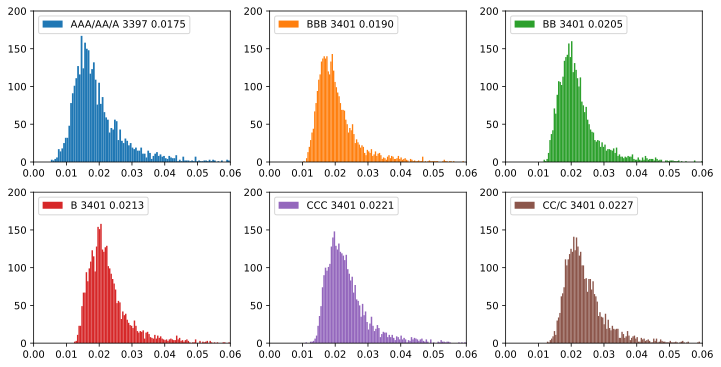

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6)) 
ax = ax.flatten()
i = 0
describe = pd.DataFrame()
#vol_df = vol_cond_df
for e in [['AAA', 'AA', 'A'], ['BBB'],['BB'],['B'],['CCC'],['CC','C']]:
    print('ESG_rating:%s' %e)
    all_avg_vol = pd.DataFrame()
    for year in vol_df.index.year.unique():
        sub_ESG_df = ESG_df[ESG_df['年份'] == year]
        sub_sub_ESG_df = sub_ESG_df[sub_ESG_df['综合评级'].isin(e)]
        v = vol_df.loc[[i for i in vol_df.index if i.year == year]]
        code_list = np.intersect1d(sub_sub_ESG_df['股票代码'].values, v.columns.values)
        print('year:%s' %year, '有价格数据的ESG个数：', len(code_list))
        avg_vol = v[code_list].mean(axis=1)                                # 波动率平均
        all_avg_vol = pd.concat([all_avg_vol, avg_vol])
        #all_avg_vol.columns = [' & '.join(e)]
    #print(all_avg_vol)
    #break
    all_avg_vol.columns = [' & '.join(e)]
    all_avg_vol = all_avg_vol.dropna()
    ax[i].hist(all_avg_vol, bins=200, label='/'.join(e) + ' ' + str(all_avg_vol.shape[0]) + ' '
                                        + str(all_avg_vol.median().values[0])[:6],
                                      color='C%s' %i)  
    ax[i].set_xlim(0, 0.06)
    ax[i].set_ylim(0, 200)
    d = {}
    d['Mean'] = all_avg_vol.mean().values[0]
    d['Median'] = all_avg_vol.median().values[0]
    d['Std'] = all_avg_vol.std().values[0]
    d['Min'] = all_avg_vol.min().values[0]
    d['Max'] = all_avg_vol.max().values[0]
    d['Skew'] = all_avg_vol.skew().values[0]
    d['Kurt'] = all_avg_vol.kurt().values[0]
    d = pd.DataFrame(d, index=[' & '.join(e)])
    describe = pd.concat([describe, d], axis=0)
    ax[i].legend(loc=2)
    i += 1
#plt.savefig('outputs/ESG_vol.eps')
plt.show()

In [13]:
# 设置浮点数显示位数为4位
pd.set_option('display.precision', 4)
describe

,Mean,Median,Std,Min,Max,Skew,Kurt
AAA & AA & A,0.0199,0.0176,0.0093,0.0053,0.1123,2.7351,12.8812
BBB,0.0207,0.0190,0.0073,0.0103,0.0926,2.9979,15.1878
BB,0.0223,0.0206,0.0075,0.0116,0.0998,3.0762,16.1499
B,0.0231,0.0213,0.0078,0.0123,0.1012,3.0266,15.5777
CCC,0.0239,0.0221,0.0078,0.0109,0.1014,2.9101,14.6428
CC & C,0.0244,0.0227,0.0074,0.0126,0.0967,2.8454,14.1868


In [89]:
describe.to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n & Mean & Median & Std & Min & Max & Skew & Kurt \\\\\n\\midrule\nAAA & AA & A & 0.019941 & 0.017598 & 0.009280 & 0.005259 & 0.112265 & 2.735113 & 12.881155 \\\\\nBBB & 0.020706 & 0.019004 & 0.007268 & 0.010271 & 0.092589 & 2.997865 & 15.187774 \\\\\nBB & 0.022339 & 0.020567 & 0.007548 & 0.011564 & 0.099802 & 3.076169 & 16.149939 \\\\\nB & 0.023087 & 0.021302 & 0.007780 & 0.012326 & 0.101177 & 3.026646 & 15.577742 \\\\\nCCC & 0.023869 & 0.022115 & 0.007788 & 0.010945 & 0.101408 & 2.910055 & 14.642774 \\\\\nCC & C & 0.024416 & 0.022705 & 0.007414 & 0.012587 & 0.096728 & 2.845389 & 14.186798 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [91]:
# 将数据框转换为 LaTeX 格式
latex_table = describe.to_latex(float_format="%.4f")

# 打印 LaTeX 表格
print(latex_table)

\begin{tabular}{lrrrrrrr}
\toprule
 & Mean & Median & Std & Min & Max & Skew & Kurt \\
\midrule
AAA & AA & A & 0.0199 & 0.0176 & 0.0093 & 0.0053 & 0.1123 & 2.7351 & 12.8812 \\
BBB & 0.0207 & 0.0190 & 0.0073 & 0.0103 & 0.0926 & 2.9979 & 15.1878 \\
BB & 0.0223 & 0.0206 & 0.0075 & 0.0116 & 0.0998 & 3.0762 & 16.1499 \\
B & 0.0231 & 0.0213 & 0.0078 & 0.0123 & 0.1012 & 3.0266 & 15.5777 \\
CCC & 0.0239 & 0.0221 & 0.0078 & 0.0109 & 0.1014 & 2.9101 & 14.6428 \\
CC & C & 0.0244 & 0.0227 & 0.0074 & 0.0126 & 0.0967 & 2.8454 & 14.1868 \\
\bottomrule
\end{tabular}

